In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/3p/zmnv4h7n68df06xh1s3kz_1h0000gn/T/ipykernel_63810/1428616548.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=20)


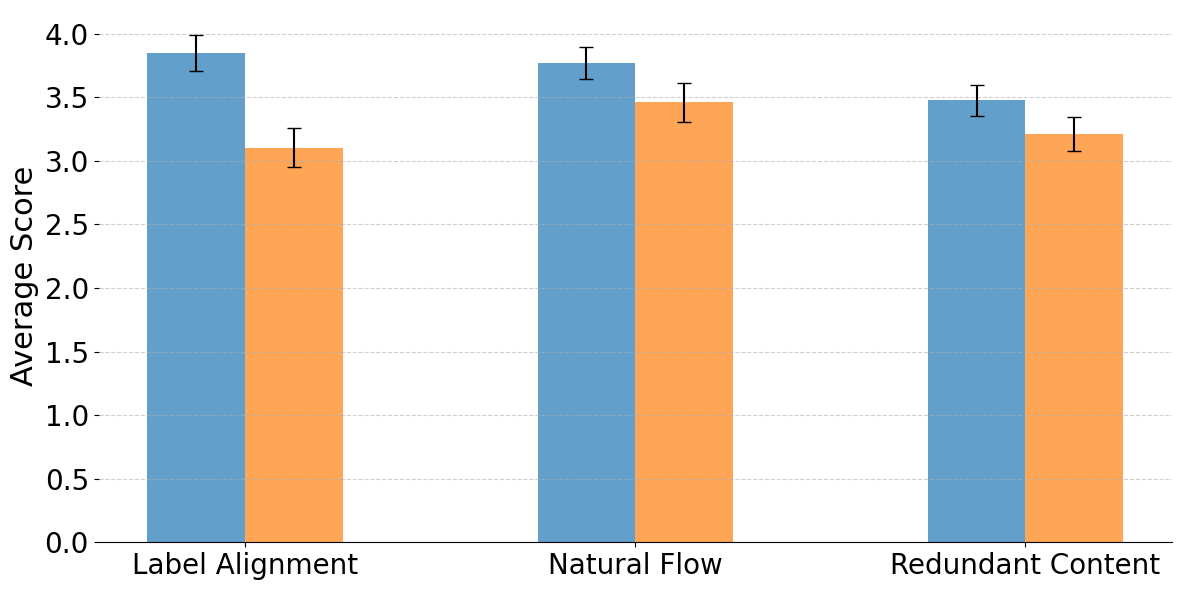

In [26]:
# plot three groups for `label_alignment`, `pass_verification`, and `original_label` with two bars one for `pass_verification==True` and one for `pass_verification==False`
# use ax.bar to plot the bars
df = pd.read_csv('study_results.csv')

fig, ax = plt.subplots(figsize=(12, 6))
sns.color_palette("colorblind")
# Calculate means and standard errors for each group
metrics = ['label_alignment', 'natural_flow', 'redundant_content']
labels = ['Label Alignment', 'Natural Flow', 'Redundant Content']

means = []
errors = []
for verified in [1, 0]:
    group_means = []
    group_errors = []
    for metric in metrics:
        data = df[df['pass_verification'] == verified][metric]
        mean = data.mean()
        se = data.std() / np.sqrt(len(data))
        ci = 1.96 * se  # 95% confidence interval
        group_means.append(mean)
        group_errors.append(ci)
    means.append(group_means)
    errors.append(group_errors)

# Set width and positions for bars
width = 0.25
x = np.arange(len(metrics))
alpha = 0.7
# Plot bars with error bars
ax.bar(x - width/2, means[0], width, yerr=errors[0], label='Verified', 
       capsize=5, alpha=alpha)
ax.bar(x + width/2, means[1], width, yerr=errors[1], label='Not Verified', 
       capsize=5, alpha=alpha)

# Customize plot
ax.set_ylabel('Average Score', fontsize=22)
ax.set_yticklabels(ax.get_yticks(), fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=20)
ax.legend(fontsize=16)

# Add grid for better readability
ax.grid(True, axis='y', linestyle='--', alpha=0.6)
sns.despine(left=True, bottom=False)
plt.tight_layout()
plt.savefig('human_verification_results.png', dpi=300, bbox_inches='tight')
# no legend when saving pdf
plt.legend().set_visible(False)
plt.savefig('human_verification_results.pdf', dpi=300, bbox_inches='tight')

plt.show()